In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import joblib
from sklearn.neighbors import KNeighborsClassifier

RANDOM_SEED = 42


In [128]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


In [129]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


# Specify data-path

In [130]:
dataset = 'model/gesture_classifier/gesture_train_akshay.csv'

column_names = ['class', '1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45']

#X_column_names = ['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45']

df = pd.read_csv(dataset, header = None, names=column_names)
df = df.dropna()

# shuffle the DataFrame rows
df = df.sample(frac = 1)

df.head()

,class,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
6328,5.0,-0.297468,0.0,-0.088608,-0.405063,0.088608,-0.348101,0.075949,-0.284810,-0.063291,...,-0.765823,-0.259494,-0.012658,-0.234177,-0.094937,-0.196203,-0.126582,-0.525316,-0.025316,-0.170886
24698,14.0,-0.591837,0.0,-0.469388,-0.326531,-0.319728,-0.258503,-0.319728,-0.163265,0.034014,...,-0.734694,-0.360544,-0.040816,-0.333333,-0.108844,-0.319728,-0.115646,-0.197279,-0.122449,-0.258503
1482,2.0,-0.121212,0.0,0.054545,-0.278788,0.218182,-0.193939,0.169697,-0.206061,-0.060606,...,-0.660606,-0.181818,-0.012121,-0.193939,-0.133333,-0.163636,-0.193939,-0.618182,0.157576,-0.090909
29083,17.0,-0.439306,0.0,-0.138728,-0.364162,0.005780,-0.312139,0.063584,-0.138728,-0.092486,...,-0.872832,-0.248555,-0.023121,-0.248555,-0.046243,-0.236994,-0.057803,-0.190751,-0.202312,-0.404624
2655,1.0,-0.186567,0.0,-0.097015,-0.276119,0.179104,-0.231343,0.335821,-0.126866,-0.052239,...,-0.664179,-0.238806,-0.022388,-0.276119,-0.126866,-0.223881,-0.186567,-0.268657,-0.111940,-0.156716


In [ ]:
X = df.iloc[:, 1:]
Y = df.iloc[:, :1]

# print(X.head)
# print(Y.head)

print(X)
print(Y)

              1    2         3         4         5         6         7  \
6328  -0.297468  0.0 -0.088608 -0.405063  0.088608 -0.348101  0.075949   
24698 -0.591837  0.0 -0.469388 -0.326531 -0.319728 -0.258503 -0.319728   
1482  -0.121212  0.0  0.054545 -0.278788  0.218182 -0.193939  0.169697   
29083 -0.439306  0.0 -0.138728 -0.364162  0.005780 -0.312139  0.063584   
2655  -0.186567  0.0 -0.097015 -0.276119  0.179104 -0.231343  0.335821   
...         ...  ...       ...       ...       ...       ...       ...   
12837 -0.447761  0.0 -0.184080 -0.253731  0.059701 -0.223881  0.004975   
1901  -0.138554  0.0 -0.018072 -0.283133  0.102410 -0.192771  0.180723   
16340 -0.385870  0.0 -0.065217 -0.429348  0.255435 -0.288043  0.271739   
25920 -0.583851  0.0 -0.403727 -0.335404 -0.248447 -0.273292 -0.211180   
14685 -0.417112  0.0 -0.069519 -0.390374  0.229947 -0.283422  0.304813   

              8         9        10  ...        36        37        38  \
6328  -0.284810 -0.063291 -0.417722  

# Reading Dataset

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.30 , random_state = RANDOM_SEED, stratify=Y)

Dtree = DecisionTreeClassifier(random_state = RANDOM_SEED) 
Dtree.fit(X_train, Y_train)

predictions = Dtree.predict(X_test)

# print(classification_report(Y_test, predictions))

# print("Confusion Matrix")
# print(confusion_matrix(Y_test, predictions))

print("\n Accuracy")
print(accuracy_score(Y_test, predictions))



 Accuracy
0.9813468226367372


## Using Decision tree

In [133]:
# Evaluation using Decison Tree

dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)

scores_dtree = cross_val_score(dtree, X, Y, cv = 5, scoring = 'accuracy')
print(scores_dtree)
print("Cross Validation accuracy using Decision Tree",scores_dtree.mean())

dtree.fit(X_train, Y_train)
Y_pred_dtree = dtree.predict(X_test)

print("Accuracy using Decision Tree =", accuracy_score(Y_test, Y_pred_dtree))

[0.98450838 0.98482453 0.98403414 0.98482213 0.98371542]
Cross Validation accuracy using Decision Tree 0.9843809211997916
Accuracy using Decision Tree = 0.98303298556223


In [134]:
# Calculate and print confusion matrix and other performance measures 
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       496
         1.0       0.99      0.98      0.99       628
         2.0       1.00      0.99      0.99       658
         3.0       0.98      0.98      0.98       446
         4.0       0.98      0.99      0.99       390
         5.0       0.98      0.97      0.98       283
         6.0       0.98      0.98      0.98       398
         7.0       0.98      0.97      0.98       368
         8.0       0.95      0.96      0.95       519
         9.0       0.98      0.98      0.98      1246
        10.0       0.98      0.99      0.99       502
        11.0       0.97      0.97      0.97       552
        12.0       0.96      0.97      0.97       342
        13.0       0.97      0.98      0.97       507
        14.0       0.99      0.97      0.98       420
        15.0       0.96      0.98      0.97       286
        16.0       1.00      0.99      1.00       378
        17.0       0.99    

Saving Model

In [135]:
joblib.dump(Dtree, "DT_gesture_model_akshay.pkl") 

['DT_gesture_model_akshay.pkl']

Using KNN

Using 3-NN


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       496
         1.0       1.00      1.00      1.00       628
         2.0       1.00      1.00      1.00       658
         3.0       0.99      1.00      1.00       446
         4.0       1.00      1.00      1.00       390
         5.0       0.99      1.00      0.99       283
         6.0       1.00      1.00      1.00       398
         7.0       1.00      0.99      0.99       368
         8.0       1.00      0.98      0.99       519
         9.0       0.99      1.00      1.00      1246
        10.0       0.99      1.00      0.99       502
        11.0       0.99      1.00      0.99       552
        12.0       1.00      0.99      0.99       342
        13.0       1.00      1.00      1.00       507
        14.0       1.00      1.00      1.00       420
        15.0       1.00      1.00      1.00       286
        16.0       1.00      1.00      1.00       378
        17.0       1.00    

C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

scores euclidean:  [0.99699652 0.99699652 0.99668037 0.99557312 0.99699605]
mean score:  0.9966485162557687


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

scores manhattan:  [0.9971546  0.99762883 0.9971546  0.99557312 0.99731225]
mean score:  0.9969646818013119
Plotting the accuracy for different values of K


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

1  scores:  [0.9982294039655653]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

2  scores:  [0.9982294039655653, 0.9975970528804519]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

3  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

4  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

5  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

6  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

7  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

8  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

9  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

10  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

11  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

12  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

13  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577, 0.9909889820416151]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

14  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577, 0.9909889820416151, 0.9905463242856196]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

15  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577, 0.9909889820416151, 0.9905463242856196, 0.990008824863572]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

16  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577, 0.9909889820416151, 0.9905463242856196, 0.990008824863572, 0.9900088198650652]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

17  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577, 0.9909889820416151, 0.9905463242856196, 0.990008824863572, 0.9900088198650652, 0.9895661871016035]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

18  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577, 0.9909889820416151, 0.9905463242856196, 0.990008824863572, 0.9900088198650652, 0.9895661871016035, 0.9889970721247028]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

19  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577, 0.9909889820416151, 0.9905463242856196, 0.990008824863572, 0.9900088198650652, 0.9895661871016035, 0.9889970721247028, 0.9884911832590013]


C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was pas

20  scores:  [0.9982294039655653, 0.9975970528804519, 0.9966485162557687, 0.9961110068367075, 0.9952573368706099, 0.9947198524440823, 0.9938977880358243, 0.99336028361527, 0.9927279375286634, 0.9926014703107444, 0.9918110464498732, 0.9913683736983577, 0.9909889820416151, 0.9905463242856196, 0.990008824863572, 0.9900088198650652, 0.9895661871016035, 0.9889970721247028, 0.9884911832590013, 0.988459557707135]
maximum score:  0.9982294039655653
Best K value:  1


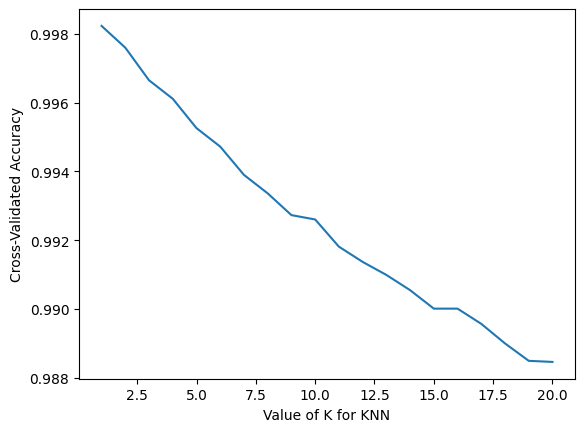

In [136]:
from sklearn.neighbors import KNeighborsClassifier

dataset = 'model/gesture_classifier/gesture_train_akshay.csv'

df = pd.read_csv(dataset, header = None) # names=column_names)
df = df.dropna()

# shuffle the DataFrame rows
df = df.sample(frac = 1)

X = df.iloc[:, 1:]
Y = df.iloc[:, :1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.30 , random_state = RANDOM_SEED, stratify=Y)

print("Using 3-NN")

knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, Y_train)
# print(X.shape)
# print(Y.shape)

knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)

print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

# k (5)- fold method for training and testing split and check the difference in performance of 3-NN¶

print("Using 3-NN after 5-fold cross-validation")

from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

knn_cv_euclidean = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores_euclidean = cross_val_score(knn_cv_euclidean, X, Y, cv=5, scoring='accuracy')
print("scores euclidean: ", scores_euclidean)
print('mean score: ', scores_euclidean.mean())

knn_cv_manhattan = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
scores_manhattan = cross_val_score(knn_cv_manhattan, X, Y, cv=5, scoring='accuracy')
print("scores manhattan: ", scores_manhattan)
print('mean score: ', scores_manhattan.mean())

print("Plotting the accuracy for different values of K")

k_scores=[]

for k in range(1,21):
    knn_iter = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    scores = cross_val_score(knn_iter, X, Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(k,' scores: ', k_scores)


#### Write your answer here ####
import matplotlib.pyplot as plt
%matplotlib inline

k_range = list(range(1, 21))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

print('maximum score: ', max(k_scores))
print('Best K value: ', k_scores.index(max(k_scores))+1)

In [137]:
joblib.dump(knn, "KNN_gesture_model_akshay.pkl") 

['KNN_gesture_model_akshay.pkl']

### Using ada-boost

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

dataset = 'model/gesture_classifier/gesture_train_akshay.csv'

df = pd.read_csv(dataset, header = None) # names=column_names)
df = df.dropna()

# shuffle the DataFrame rows
df = df.sample(frac = 1)

X = df.iloc[:, 1:]
Y = df.iloc[:, :1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.30 , random_state = RANDOM_SEED, stratify=Y)

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))



C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       496
         1.0       0.11      0.98      0.19       628
         2.0       0.00      0.00      0.00       658
         3.0       0.39      0.99      0.56       446
         4.0       0.00      0.00      0.00       390
         5.0       0.00      0.00      0.00       283
         6.0       0.00      0.00      0.00       398
         7.0       0.00      0.00      0.00       368
         8.0       0.00      0.00      0.00       519
         9.0       0.51      0.76      0.61      1246
        10.0       0.00      0.00      0.00       502
        11.0       0.00      0.00      0.00       552
        12.0       0.00      0.00      0.00       342
        13.0       0.00      0.00      0.00       507
        14.0       0.00      0.00      0.00       420
        15.0       0.00      0.00      0.00       286
        16.0       0.41      0.07      0.11       378
        17.0       0.00    

C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using Guassian Naive-Bayes

In [139]:
# import Classifier library
from sklearn.naive_bayes import GaussianNB

dataset = 'model/gesture_classifier/gesture_train_akshay.csv'
df = pd.read_csv(dataset, header = None) # names=column_names)
df = df.dropna()

# shuffle the DataFrame rows
df = df.sample(frac = 1)

X = df.iloc[:, 1:]
Y = df.iloc[:, :1]

# Create the Classifier-object
nb=GaussianNB()

# Divide the dataset into training and testing partition

#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30) #, stratify=Y)
predictions = nb.fit(X_train, Y_train).predict(X_test)

# Print Number of mislabeled points
print("Number of mislabeled points: ")
#(X_test.shape[0], (Y_test != predictions).sum())

# Calculate and print confusion matrix and other performance measures (Refer previous labsheet)

print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

Number of mislabeled points: 
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       489
         1.0       1.00      0.96      0.98       642
         2.0       0.98      0.99      0.99       692
         3.0       0.92      0.95      0.93       440
         4.0       1.00      0.98      0.99       365
         5.0       0.96      0.92      0.94       278
         6.0       1.00      0.99      0.99       419
         7.0       1.00      0.97      0.98       380
         8.0       0.95      0.93      0.94       506
         9.0       0.98      0.92      0.95      1215
        10.0       0.84      0.99      0.91       498
        11.0       0.98      0.92      0.95       563
        12.0       0.83      0.98      0.90       346
        13.0       0.99      0.96      0.97       518
        14.0       0.96      0.97      0.96       441
        15.0       0.90      0.98      0.94       285
        16.0       1.00      0.99      1.00       3

C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Using SVM

In [140]:
from sklearn import svm

dataset = 'model/gesture_classifier/gesture_train_akshay.csv'
df = pd.read_csv(dataset, header = None) # names=column_names)
df = df.dropna()

# shuffle the DataFrame rows
df = df.sample(frac = 1)

X = df.iloc[:, 1:]
Y = df.iloc[:, :1]

#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30) #, stratify=Y)

# one vs. rest approach
#svc_clf = svm.SVC(decision_function_shape='ovr')

# one vs. one approach
svc_clf = svm.SVC(decision_function_shape='ovo')

predictions = svc_clf.fit(X_train, Y_train).predict(X_test)

# Print Number of mislabeled points
print("Number of mislabeled points: ")
#(X_test.shape[0], (Y_test != predictions).sum())

# Calculate and print confusion matrix and other performance measures (Refer previous labsheet)

print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

C:\Users\agola\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of mislabeled points: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       468
         1.0       1.00      0.99      0.99       649
         2.0       1.00      1.00      1.00       686
         3.0       1.00      1.00      1.00       442
         4.0       0.99      1.00      1.00       368
         5.0       0.98      1.00      0.99       265
         6.0       1.00      0.99      0.99       399
         7.0       1.00      0.98      0.99       385
         8.0       0.99      0.98      0.99       545
         9.0       0.99      0.99      0.99      1255
        10.0       0.98      1.00      0.99       503
        11.0       0.95      0.98      0.97       562
        12.0       1.00      0.92      0.96       323
        13.0       1.00      0.96      0.98       514
        14.0       0.96      1.00      0.98       425
        15.0       0.99      1.00      0.99       274
        16.0       1.00      1.00      1.00       3

NameError: name 'X_column_names' is not defined

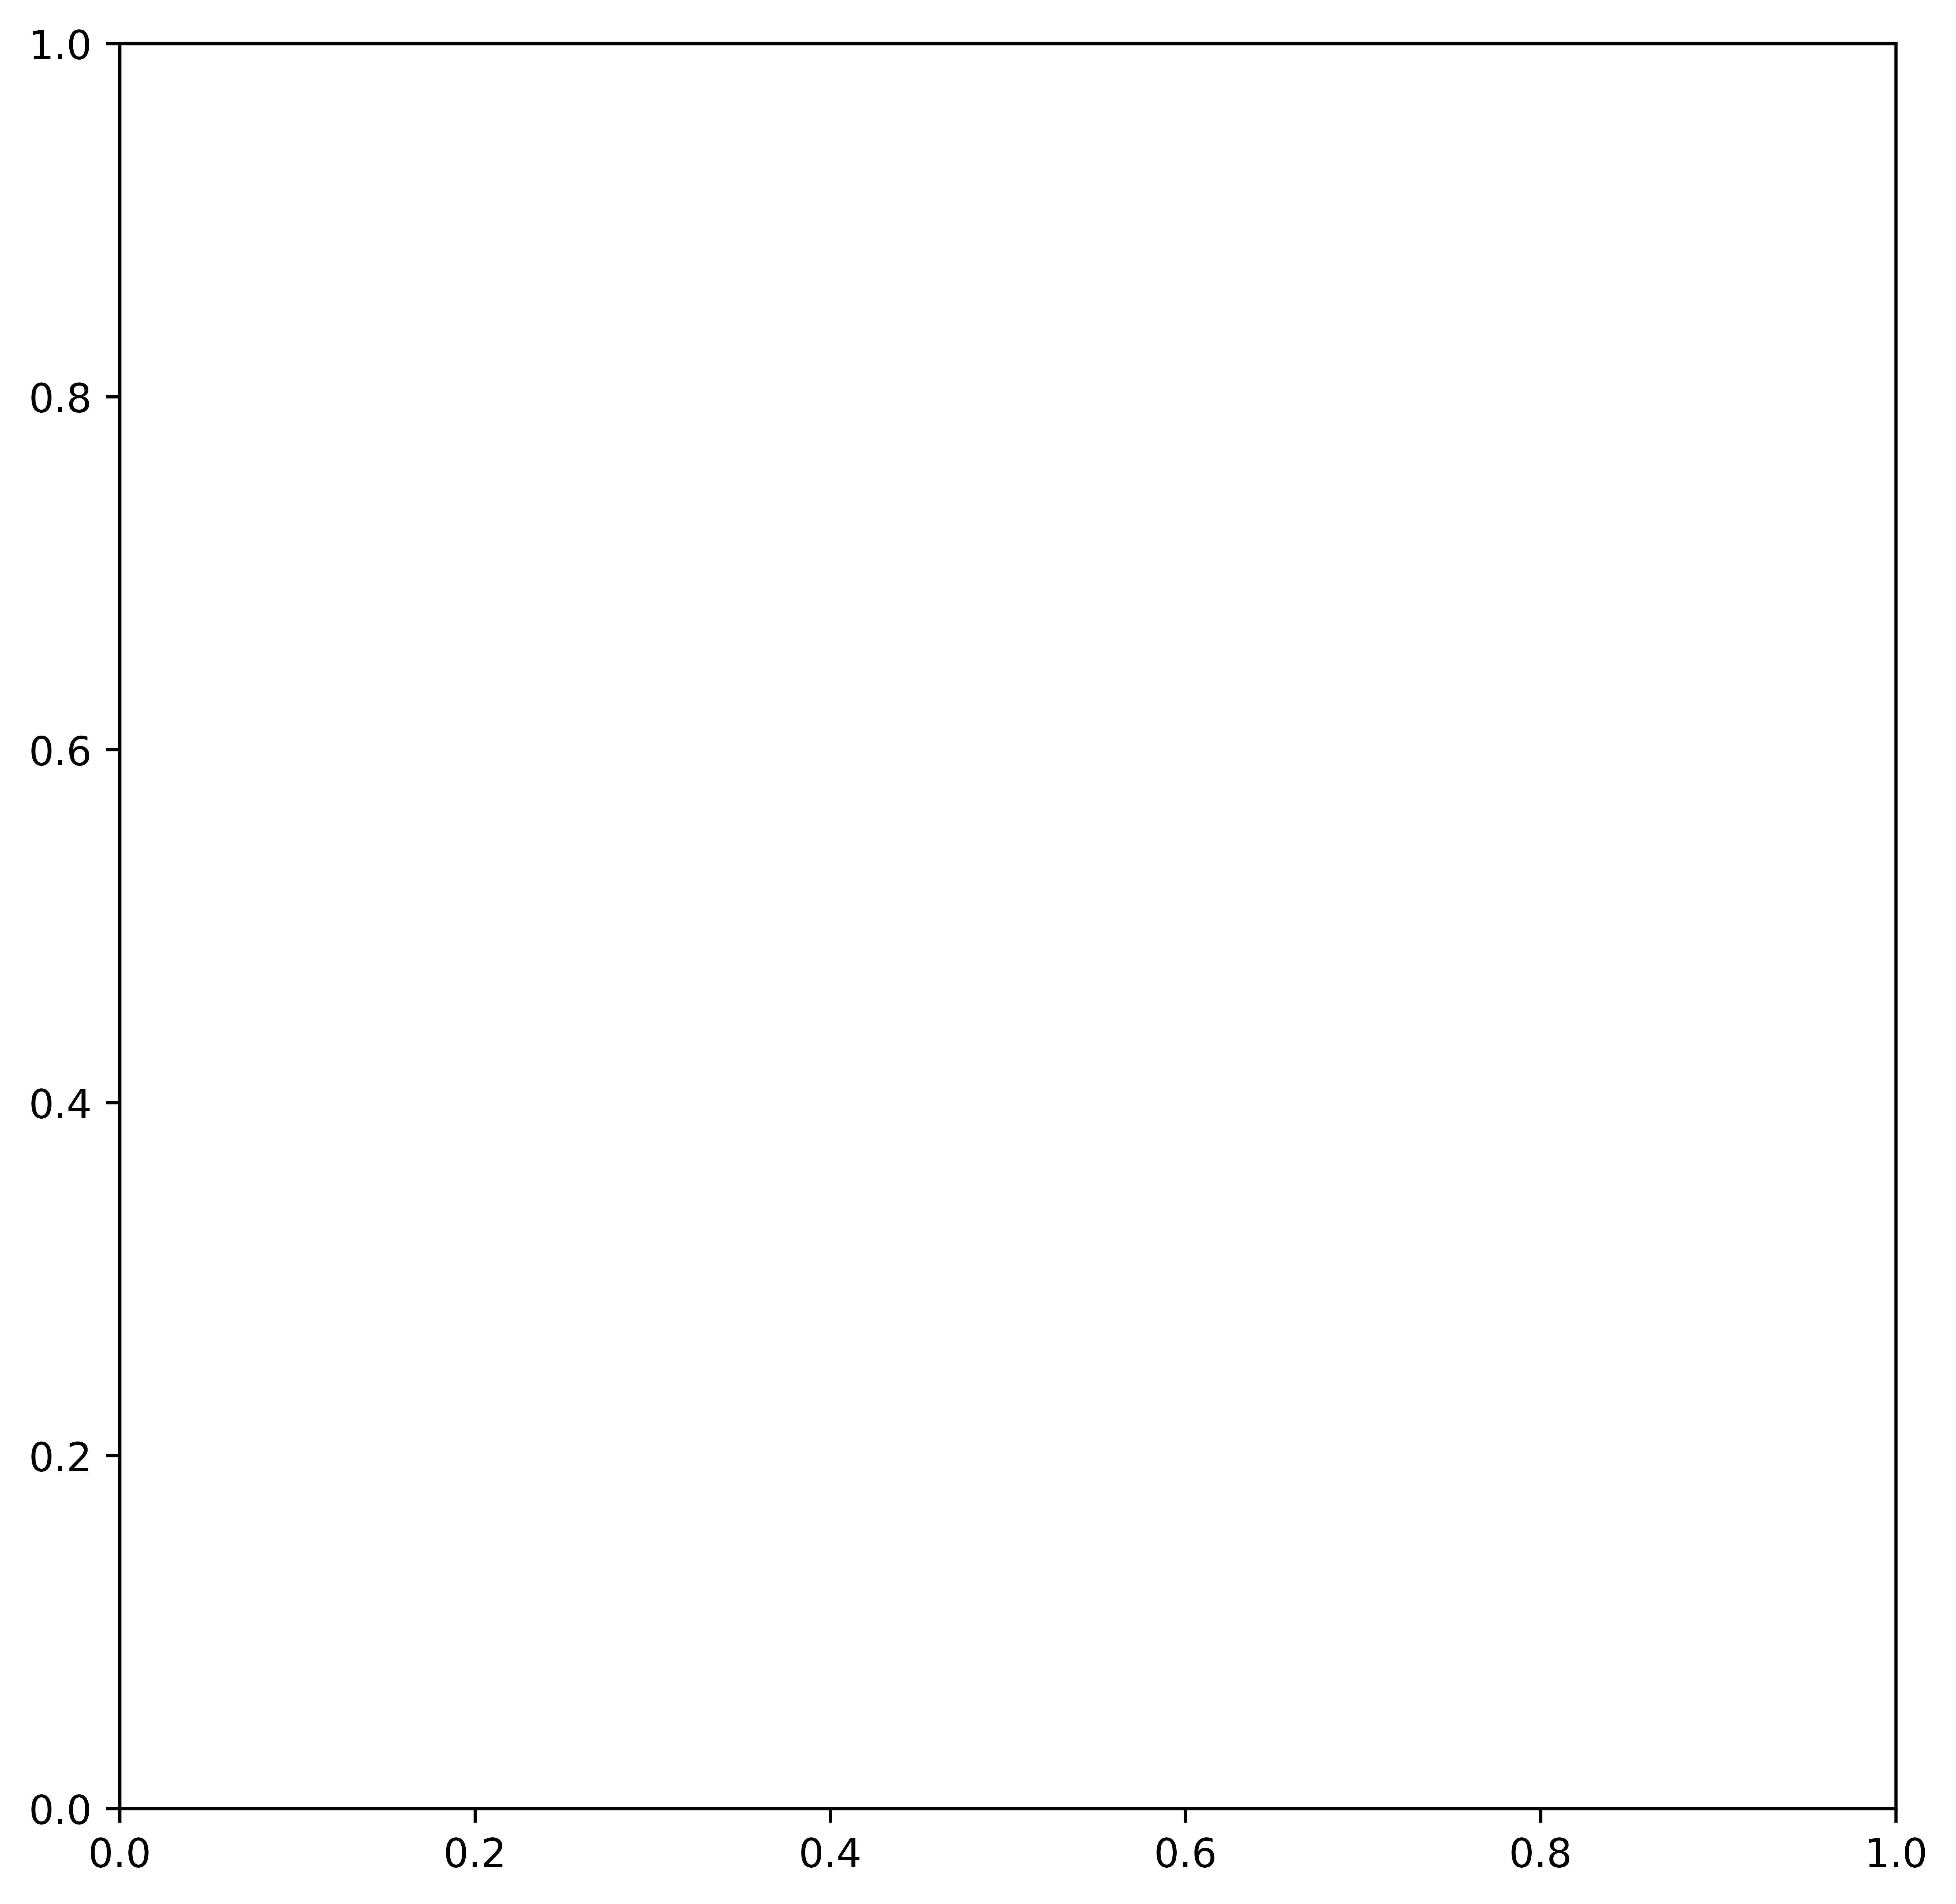

In [141]:
fig,axes = plt.subplots(nrows=1, ncols = 1, figsize=(8,8), dpi=1024)
tree.plot_tree(Dtree, class_names=["0", "1", "2"], filled=True, feature_names=X_column_names)

In [42]:
np.array(df.iloc[:,42]).reshape(1, -1)

array([[-0.11688312, -0.18181818, -0.18181818, ..., -0.13461539,
        -0.1483871 , -0.12426036]])

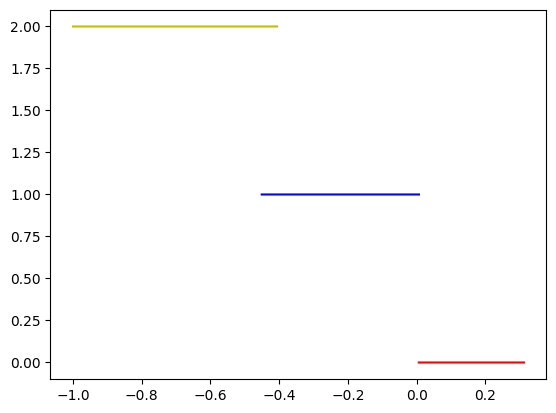

In [ ]:

x = df[df['class'] == 0]
y = df[df['class'] == 1]
z = df[df['class'] == 2]


plt.plot(x.iloc[:,43],[0 for i in range(x.shape[0])], c='r')
plt.plot(y.iloc[:,43],[1 for i in range(y.shape[0])], c='b')
plt.plot(z.iloc[:,43],[2 for i in range(z.shape[0])], c='y')

plt.show()

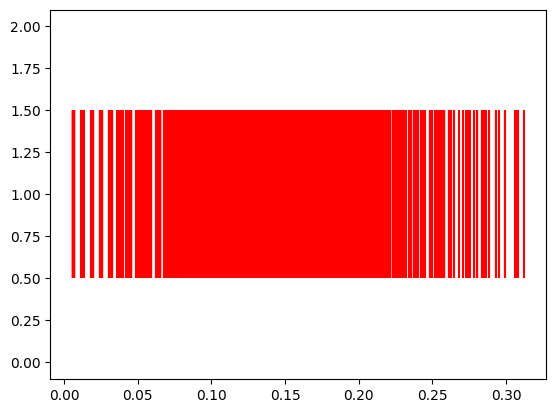

In [ ]:
plt.eventplot(x.iloc[:,43], colors='r')

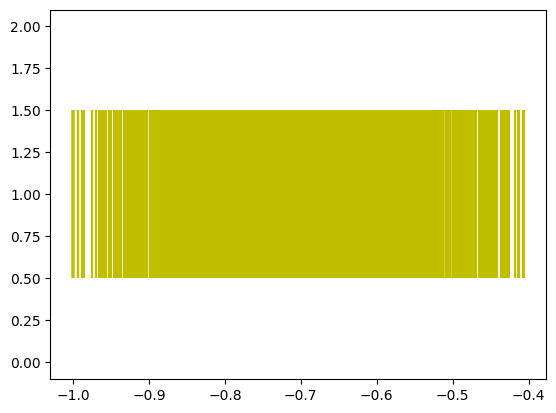

In [ ]:
plt.eventplot(z.iloc[:,43], colors='y')